In [1]:
!pip3 install tensorflow


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

# Neural Network Arsenal
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer , MinMaxScaler,StandardScaler



In [2]:
import keras

In [3]:
mainData1= pd.read_csv("C:\\Users\\gohse\\SC1015 Generic\\Possible_Data_Test\\spotify8DB_data\\SpotifyFeatures.csv",header = 0)

In [4]:
mainData1.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
mainData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
#dataframe containing all 10x features affecting popularity

features = pd.DataFrame(mainData1[["danceability", "energy", "loudness", "speechiness", "acousticness","instrumentalness","liveness","valence","tempo","duration_ms","popularity"]])

In [7]:
features.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
danceability,1.000000,0.325807,0.438668,0.134560,-0.364546,-0.364941,-0.041684,0.547154,0.021939,-0.125781,0.256564
energy,0.325807,1.000000,0.816088,0.145120,-0.725576,-0.378957,0.192801,0.436771,0.228774,-0.030550,0.248922
loudness,0.438668,0.816088,1.000000,-0.002273,-0.690202,-0.506320,0.045686,0.399901,0.228364,-0.047618,0.363011
speechiness,0.134560,0.145120,-0.002273,1.000000,0.150935,-0.177147,0.510147,0.023842,-0.081541,-0.016171,-0.151076
acousticness,-0.364546,-0.725576,-0.690202,0.150935,1.000000,0.316154,0.069004,-0.325798,-0.238247,0.011203,-0.381295
instrumentalness,-0.364941,-0.378957,-0.506320,-0.177147,0.316154,1.000000,-0.134198,-0.307522,-0.104133,0.076021,-0.210983
liveness,-0.041684,0.192801,0.045686,0.510147,0.069004,-0.134198,1.000000,0.011804,-0.051355,0.023783,-0.167995
valence,0.547154,0.436771,0.399901,0.023842,-0.325798,-0.307522,0.011804,1.000000,0.134857,-0.141811,0.060076
tempo,0.021939,0.228774,0.228364,-0.081541,-0.238247,-0.104133,-0.051355,0.134857,1.000000,-0.028456,0.081039
duration_ms,-0.125781,-0.030550,-0.047618,-0.016171,0.011203,0.076021,0.023783,-0.141811,-0.028456,1.000000,0.002348


C:\Users\gohse\AppData\Local\Temp\ipykernel_19444\952734095.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(mainData1.corr(), cmap='cool')


<Axes: >

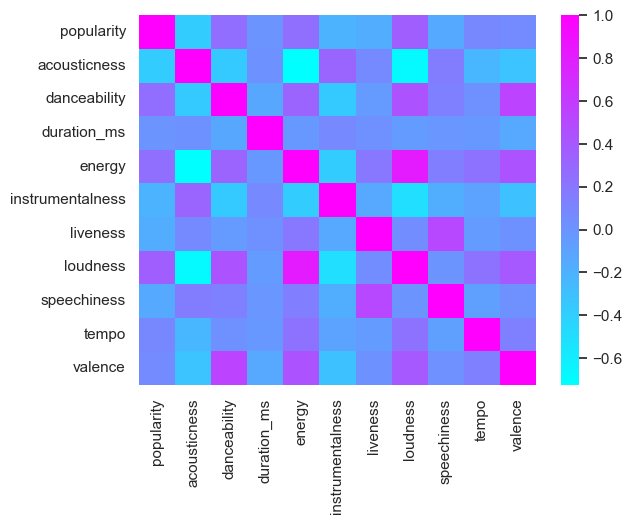

In [8]:
sb.heatmap(mainData1.corr(), cmap='cool')

#Factors best used for predicting would be loudness and acousticness

In [9]:
mainData1["popularity"].describe()

# note the dependant variable ranges from 0-100
# We plan to scale result to a binary 1 or 0
# 1 means song is popular, popular means it is top 25% percentile (popularity > 55)

count    232725.000000
mean         41.127502
std          18.189948
min           0.000000
25%          29.000000
50%          43.000000
75%          55.000000
max         100.000000
Name: popularity, dtype: float64

In [10]:
X = features.drop(['popularity'],axis = 1)
# Dataframe with only the 10x independent variables

In [11]:
X


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.389,0.910,-1.828,0.0525,0.61100,0.000000,0.3460,0.814,166.969,99373
1,0.590,0.737,-5.559,0.0868,0.24600,0.000000,0.1510,0.816,174.003,137373
2,0.663,0.131,-13.879,0.0362,0.95200,0.000000,0.1030,0.368,99.488,170267
3,0.240,0.326,-12.178,0.0395,0.70300,0.000000,0.0985,0.227,171.758,152427
4,0.331,0.225,-21.150,0.0456,0.95000,0.123000,0.2020,0.390,140.576,82625
...,...,...,...,...,...,...,...,...,...,...
232720,0.687,0.714,-10.626,0.0316,0.00384,0.544000,0.0845,0.962,115.542,326240
232721,0.785,0.683,-6.944,0.0337,0.03290,0.000880,0.2370,0.969,113.830,282447
232722,0.517,0.419,-8.282,0.1480,0.90100,0.000000,0.0945,0.813,84.135,166960
232723,0.745,0.704,-7.137,0.1460,0.26200,0.000000,0.3330,0.489,100.031,222442


In [12]:
# y is dataframe of just popularity

y = pd.DataFrame(features["popularity"])

In [13]:
y

,popularity
0,0
1,1
2,3
3,0
4,4
...,...
232720,39
232721,38
232722,47
232723,44


In [14]:
y.value_counts() #original y distribution, trying to change to only binary(1s and 0s)

popularity
0             6312
50            5415
53            5414
51            5401
52            5342
              ... 
96               8
94               7
99               4
98               3
100              2
Length: 101, dtype: int64

In [15]:
#convert popularity values into 1 and 0
y['popularity'] = (y['popularity'] > 55).astype(int)


In [16]:
y.value_counts() #y is now a binary variable

popularity
0             178989
1              53736
dtype: int64

### 1.Split the Dataset into Train and Test and validation

In [17]:
# split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:

#set aside validation values 
X_valid = X_train
y_valid = y_train

### 2.Scaling input data(using normalization)

In [19]:
# normalisation done on x-validation and x-train and x-test 

# Normalization chosen since we did not make any assumptions on dsitributio of X-values(which involves standarization)

# y-train,y-test and y-valid also dont touch, cuz its 0-1 \already

In [20]:
# before scaling 

X_valid.describe() #note some max values go to 240, others only to 1


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,1.861800e+05
mean,0.554476,0.570541,-9.572172,0.120560,0.368895,0.148431,0.214887,0.454840,117.701595,2.349673e+05
std,0.185577,0.263253,5.991597,0.185271,0.354660,0.303013,0.198154,0.260342,30.933226,1.182312e+05
min,0.056900,0.000020,-52.457000,0.022200,0.000000,0.000000,0.009670,0.000000,30.379000,1.538700e+04
25%,0.435000,0.385000,-11.763000,0.036700,0.038100,0.000000,0.097500,0.237000,92.956750,1.829025e+05
50%,0.571000,0.605000,-7.775000,0.050000,0.233000,0.000045,0.128000,0.444000,115.872500,2.204175e+05
75%,0.692000,0.786000,-5.512000,0.105000,0.723000,0.036000,0.263000,0.660000,139.168250,2.656408e+05
max,0.987000,0.999000,3.744000,0.967000,0.996000,0.999000,1.000000,1.000000,242.903000,5.552917e+06


In [21]:
X_train.describe() #note some max values go to 240, others only to 1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,1.861800e+05
mean,0.554476,0.570541,-9.572172,0.120560,0.368895,0.148431,0.214887,0.454840,117.701595,2.349673e+05
std,0.185577,0.263253,5.991597,0.185271,0.354660,0.303013,0.198154,0.260342,30.933226,1.182312e+05
min,0.056900,0.000020,-52.457000,0.022200,0.000000,0.000000,0.009670,0.000000,30.379000,1.538700e+04
25%,0.435000,0.385000,-11.763000,0.036700,0.038100,0.000000,0.097500,0.237000,92.956750,1.829025e+05
50%,0.571000,0.605000,-7.775000,0.050000,0.233000,0.000045,0.128000,0.444000,115.872500,2.204175e+05
75%,0.692000,0.786000,-5.512000,0.105000,0.723000,0.036000,0.263000,0.660000,139.168250,2.656408e+05
max,0.987000,0.999000,3.744000,0.967000,0.996000,0.999000,1.000000,1.000000,242.903000,5.552917e+06


In [22]:
X_test.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,46545.000000,46545.000000,46545.000000,46545.000000,46545.000000,46545.000000,46545.000000,46545.000000,46545.000000,4.654500e+04
mean,0.553918,0.572624,-9.560737,0.121583,0.367222,0.147782,0.215500,0.455223,117.526545,2.357427e+05
std,0.185734,0.264259,6.024614,0.186503,0.355200,0.301790,0.198748,0.258957,30.761178,1.217134e+05
min,0.058100,0.000234,-46.122000,0.022400,0.000001,0.000000,0.009670,0.000000,31.689000,1.674800e+04
25%,0.435000,0.387000,-11.816000,0.036800,0.035300,0.000000,0.097000,0.240000,92.967000,1.826400e+05
50%,0.570000,0.609000,-7.710000,0.050300,0.230000,0.000040,0.128000,0.445000,115.437000,2.204400e+05
75%,0.691000,0.790000,-5.465000,0.107000,0.721000,0.035000,0.265000,0.660000,138.666000,2.661730e+05
max,0.989000,0.999000,1.275000,0.965000,0.996000,0.993000,1.000000,1.000000,236.735000,5.488000e+06


In [23]:
# scaling both Xvalid and Xtrain and x-test

#scaler object
scaler = MinMaxScaler()
scaler2  =StandardScaler()

#scale the 3 X-sets --- will get a numpy array of scaled values
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [24]:
# after scaling ....
X_train

array([[0.7656166 , 0.624617  , 0.79585772, ..., 0.613     , 0.60978995,
        0.02976291],
       [0.5312332 , 0.8968948 , 0.84610594, ..., 0.54      , 0.35809603,
        0.03594075],
       [0.57101387, 0.61360576, 0.76157008, ..., 0.185     , 0.41951497,
        0.04387263],
       ...,
       [0.48285131, 0.05033105, 0.41990356, ..., 0.134     , 0.26829911,
        0.03411286],
       [0.55811203, 0.46245154, 0.75612534, ..., 0.881     , 0.42036194,
        0.02743479],
       [0.84732824, 0.51350363, 0.76690806, ..., 0.665     , 0.41211816,
        0.03449426]])

In [25]:
X_valid  #after scaling ...

array([[0.7656166 , 0.624617  , 0.79585772, ..., 0.613     , 0.60978995,
        0.02976291],
       [0.5312332 , 0.8968948 , 0.84610594, ..., 0.54      , 0.35809603,
        0.03594075],
       [0.57101387, 0.61360576, 0.76157008, ..., 0.185     , 0.41951497,
        0.04387263],
       ...,
       [0.48285131, 0.05033105, 0.41990356, ..., 0.134     , 0.26829911,
        0.03411286],
       [0.55811203, 0.46245154, 0.75612534, ..., 0.881     , 0.42036194,
        0.02743479],
       [0.84732824, 0.51350363, 0.76690806, ..., 0.665     , 0.41211816,
        0.03449426]])

In [26]:
X_test # after scaling ...

array([[0.59394135, 0.94593328, 0.88940228, ..., 0.437     , 0.2432381 ,
        0.01995137],
       [0.28671178, 0.39525374, 0.80992468, ..., 0.176     , 0.50856393,
        0.03574538],
       [0.09872167, 0.15295475, 0.60911028, ..., 0.0353    , 0.31051081,
        0.02911674],
       ...,
       [0.90009668, 0.51540201, 0.85927379, ..., 0.174     , 0.51855193,
        0.05233336],
       [0.35868514, 0.47234888, 0.80735068, ..., 0.46      , 0.19115711,
        0.04610261],
       [0.80126759, 0.71164417, 0.86735447, ..., 0.849     , 0.45498083,
        0.06048323]])

### building simple ANN

now we have :
1. x-train, x-valid and x-test .......all of which are scaled through normalisation
2. y-train,y-valid and y-test........ all of which are binary values of either 1 or 0

In [27]:
# Constructing model 
# 1, chose sequential model vs functional
# 2. choose dense over sparse so that all neurons connect to each other
# 3. hidden layer activation should be relu(prefered for hidden layers
# alterntively  final node can be just 1x node, with sigmod activation. This node gives probarility of 1 or 0
# 5. compile model, things to consider... ... 
#(loss function,
#optimizer
#,metric)   
# validation
# droupout 
# learning rate 
# weight initializaation 
# regularization l1 or l2 - (cancels out some neurons, more simple )
#batch size - divding nito different chunks, makes it faster to run model, prevents overfitting, helps with generalization -> more accurate 
#epochs earlystopping-to prevent overfitting(when validation accuracy starts decreasing while model acuracy increases ) 

In [28]:
print(X_train.shape) #current 80/20 split for x-values
print(X_test.shape)

(186180, 10)
(46545, 10)


In [29]:
# since input data has 10 factors, shape of first layer(input layer) should have 10 nodes

# 5x hidden layers

In [30]:
#Step 1 create model 
model = Sequential()

model.add(Dense(500,activation = 'relu',kernel_initializer = 'he_normal',input_shape = [10,]))
model.add(Dropout(0.20))

model.add(Dense(400, kernel_initializer='he_normal', activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(300, kernel_initializer='he_normal', activation = 'relu'))
model.add(Dropout(0.15))


model.add(Dense(200, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(100, kernel_initializer = 'he_normal', activation = 'relu'))


model.add(Dense(64,kernel_initializer = 'he_normal', activation = 'relu'))


model.add(Dense(32,kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.10))


model.add(Dense(16,kernel_initializer = 'he_normal', activation = 'relu'))



model.add(Dense(1,activation = "sigmoid")) 




C:\Users\gohse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# step 2. compile model
# optimizer RMSprop used as activartion function was 'relu'
# Learning rate at 0.0002 seemed to give best results 
opt =  keras.optimizers.RMSprop(learning_rate = 0.0002)
model.compile(loss = 'binary_crossentropy'  , optimizer = opt, metrics = ["accuracy"])





In [32]:
# Step 3 fit model
# Batch-size is set to 216 to reduce runtime 


history = model.fit(X_train,y_train,epochs = 30 , validation_data = (X_valid,y_valid), batch_size = 216 )

Epoch 1/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7454 - loss: 0.5261 - val_accuracy: 0.7717 - val_loss: 0.4783
Epoch 2/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7714 - loss: 0.4765 - val_accuracy: 0.7720 - val_loss: 0.4745
Epoch 3/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7698 - loss: 0.4756 - val_accuracy: 0.7719 - val_loss: 0.4733
Epoch 4/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7700 - loss: 0.4744 - val_accuracy: 0.7709 - val_loss: 0.4790
Epoch 5/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7720 - loss: 0.4722 - val_accuracy: 0.7720 - val_loss: 0.4716
Epoch 6/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7709 - loss: 0.4714 - val_accuracy: 0.7719 - val_loss: 0.4737
Epoch 7/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7705 - loss: 0.4709 - val_accuracy: 0.7723 - val_loss: 0.4768
Epoch 8/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7693 - loss: 0.4720 - val_acc

In [33]:
# Evaluation of Model
model.evaluate(X_test,y_test)

1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7690 - loss: 0.4629


[0.46326321363449097, 0.7711676955223083]

#### Possible Hyper-param tuning

1. batch size 
2. input nodes how many 
3. output layer how mny 
4. number of hiddent layers 
4. Optimizer 
5. activtion function : relu (but has saturation for negative values)
                      mayebe try leaky,randomizes,parametric relus or selu
6. kerna initialization -update/initlaze wights and biases (kernal_innitializer)
7. l1 l2 regularization - l1 or l2 (kernal_rehularizers = keras..l2())
8. Dropout layer regulariztion ie dropout
9. Early stopping regularization epochs - not recomennded
10. learning rate(specified within optimizer, instead of just using sgd or adam)
11. loss 